# IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# IMPORTING DATASET

In [2]:
data=pd.read_csv("C:\\Users\\Dell\\internship\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


# HANDLING MISSING VALUES

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# ENCODING CATEGORICAL DATA

In [5]:
data_cat=data.select_dtypes(include='object')

In [6]:
data_encode=LabelEncoder().fit_transform(data_cat)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
data_encode_df=pd.DataFrame(data_encode,columns=data_cat.columns)

# FEATURE SCALING

In [8]:
data_int=data.drop(['Diabetes'],axis=1)

In [9]:
from sklearn.preprocessing import RobustScaler
data_int_treat=RobustScaler().fit_transform(data_int)
data_int_treat_df=pd.DataFrame(data_int_treat,columns=data_int.columns)

In [10]:
final_data=pd.concat([data_int_treat_df,data_encode_df],axis=1)
final_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1


# SPLITING DATASET

In [11]:
x=final_data.drop(['Diabetes'],axis=1)

In [12]:
y=final_data['Diabetes']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# LOGISTIC REGRESSION

In [14]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
train=log.fit(x_train,y_train)
test=log.predict(x_test)
print(accuracy_score(y_test,test))

0.7792207792207793


In [15]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,test)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.7125580995007746

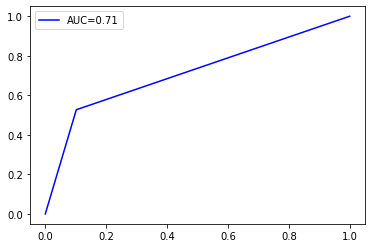

In [16]:
plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc,color="blue")
plt.legend()
plt.show()

# K NEIGHBORS ALGORITHM

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
train3=knn.fit(x_train,y_train)
test3=knn.predict(x_test)
print(accuracy_score(y_test,test3))

0.7619047619047619


# DATA VISUALIZATION

In [18]:
correlation=final_data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


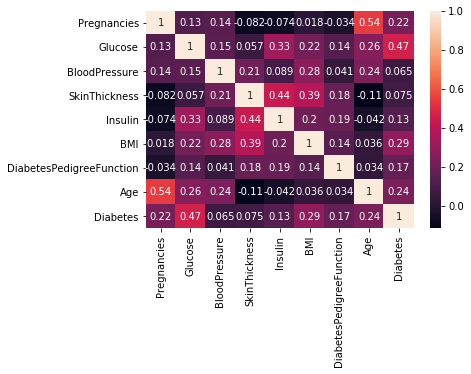

In [20]:
import seaborn as sns
sns.heatmap(correlation, annot=True)
plt.show()

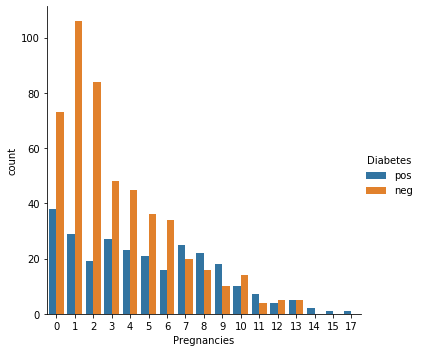

In [21]:
ax1=sns.catplot(x='Pregnancies',hue='Diabetes',data=data,kind='count')

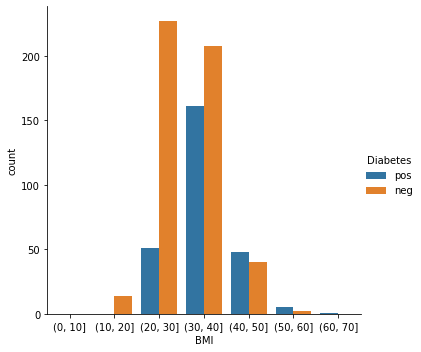

In [22]:
data['BMI']= pd.cut(data['BMI'],bins=(0,10,20,30,40,50,60,70))
ax2=sns.catplot(x='BMI',hue='Diabetes',data=data,kind='count')

In [23]:
data['BloodPressure'].min()

0

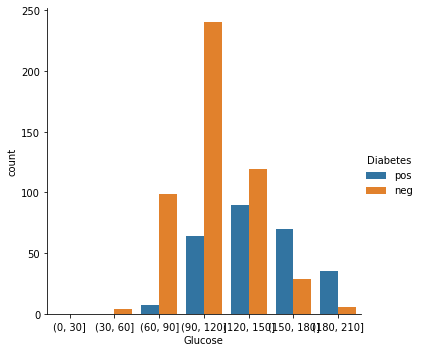

In [24]:
data['Glucose']= pd.cut(data['Glucose'],bins=(0,30,60,90,120,150,180,210))
ax3=sns.catplot(x='Glucose',hue='Diabetes',data=data,kind='count')

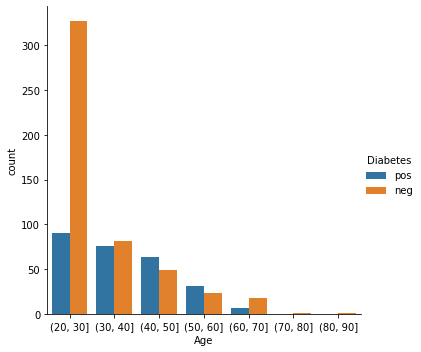

In [25]:
data['Age']= pd.cut(data['Age'],bins=(20,30,40,50,60,70,80,90))
ax4=sns.catplot(x='Age',hue='Diabetes',data=data,kind='count')

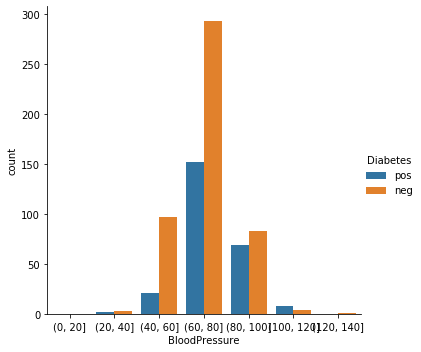

In [26]:
data['BloodPressure']= pd.cut(data['BloodPressure'],bins=(0,20,40,60,80,100,120,140))
ax5=sns.catplot(x='BloodPressure',hue='Diabetes',data=data,kind='count')